<a href="https://colab.research.google.com/github/cserik/DeepLearningNHF/blob/main/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

In [2]:
#our dataset is from kaggle
!pip install kaggle

In [3]:
#we created an API token for kaggle (kaggle.json file)
#make a directory with a name : kaggle
!mkdir ~/.kaggle

In [4]:
#copy kaggle.json file to kaggle 
!cp kaggle.json ~/.kaggle/

In [5]:
#change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!mkdir /content/data

In [7]:
%cd /content/data

/content/data


In [8]:
#download the dataset
!kaggle datasets download -d badasstechie/celebahq-resized-256x256

 99% 281M/283M [00:04<00:00, 82.7MB/s]
100% 283M/283M [00:04<00:00, 60.2MB/s]


In [ ]:
!unzip celebahq-resized-256x256.zip

In [10]:
import pathlib

base_dir = '/content/data' # Windows
#base_dir = '/tmp/celeba_hq_256' # Linux 

train_dir = os.path.join(base_dir, 'celeba_hq_256')

base_dir=pathlib.Path(base_dir)

#get the name of the images
train_fnames = os.listdir(train_dir)
print(train_fnames[:10])

['16527.jpg', '18180.jpg', '03670.jpg', '12777.jpg', '19139.jpg', '12746.jpg', '14073.jpg', '11919.jpg', '00583.jpg', '26933.jpg']


In [11]:
image_count = len(list(base_dir.glob('*/*.jpg')))
print(image_count)

30000


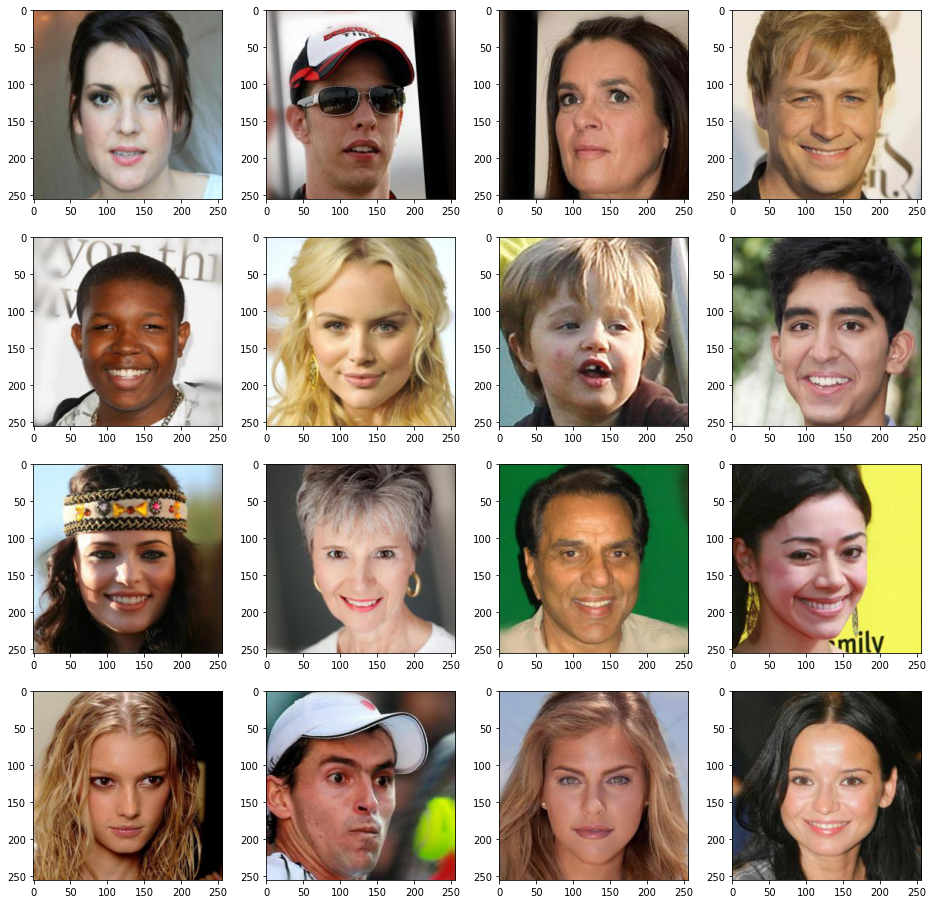

In [12]:
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

next_images = [os.path.join(train_dir, fname) for fname in train_fnames[:int(ncols*nrows)]]

for i, img_path in enumerate(next_images):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [13]:
import tensorflow as tf

In [14]:
# read in pictures
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,seed=123,image_size=(256, 256),batch_size=50)
#calss labels are generated automatically with the name of sub directories of the base directory

Found 30000 files belonging to 1 classes.


In [17]:
for image_batch, _ in train_ds:
  print(image_batch.shape)
  #in this case we don't use any labels
  #print(labels_batch.shape)
  break

(50, 256, 256, 3)
